# Write a SSAHA Algorithm With Python

## Parse FASTA

1. [Download TAIR10 refence genome.](ftp://ftp.ensemblgenomes.org/pub/plants/release-48/fasta/arabidopsis_thaliana/dna/Arabidopsis_thaliana.TAIR10.dna.toplevel.fa.gz)
2. Run your command line. Change directory (cd) to the folder in which you downloaded TAIR10. Then extract the file by typing this:
> gunzip Arabidopsis_thaliana.TAIR10.dna.toplevel.fa.gz
3. Below is the screenshot of the head of the reference genome.
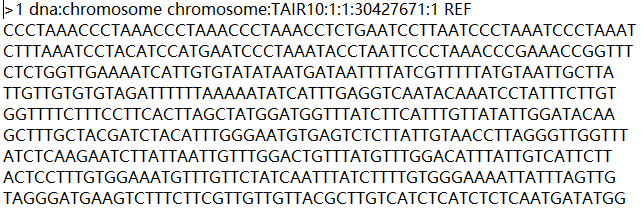
<br>
For every chromosome, the first line (as indicated by the ">") is the label and the next lines correspond to the DNA sequnces for that particular chrosome. 

In [79]:
def parse(fasta):
    with open(reference_genome, mode = "rt") as read_file:
        # create some empty lists
        label = []
        all_seq = []
        temp = []
        # iterate the fasta file line by line
        for line in read_file:
            # notice that each line ends with a trailing whitespace which must be removed to join lines into 1 string
            line = line.rstrip()
            # line that begins with ">" is the header of every chrosome sequence
            if line.startswith(">"):
                label.append(line[1:])
                # when we encounter a new header for the 2nd time and so on, we join the sequences in the temp list into 1 string
                # then, we append that string into all_seq list (all_seq would look like this [seq1, seq2, seq3,...])
                # finally, we empty the temp list, so it can temporarily retain sequences in the next chromosome
                if temp != []:
                    chr_seq = "".join(temp)  
                    all_seq.append(chr_seq)
                    temp = []
            # any other lines are sequences, so we append each line into a temporary list
            else:
                temp.append(line) 
        # the genome does not end with a header, so for the last lines
        # we also need to include the code for joining after the loop is complete
        chr_seq = "".join(temp)
        all_seq.append(chr_seq)
        temp = []
    return label, all_seq

reference_genome = "Arabidopsis_thaliana.TAIR10.dna.toplevel.fa"
label, all_seq = parse(reference_genome)

Below is just a small part of the parsed sequence: <br>
There are 7 elements in all_seq list.
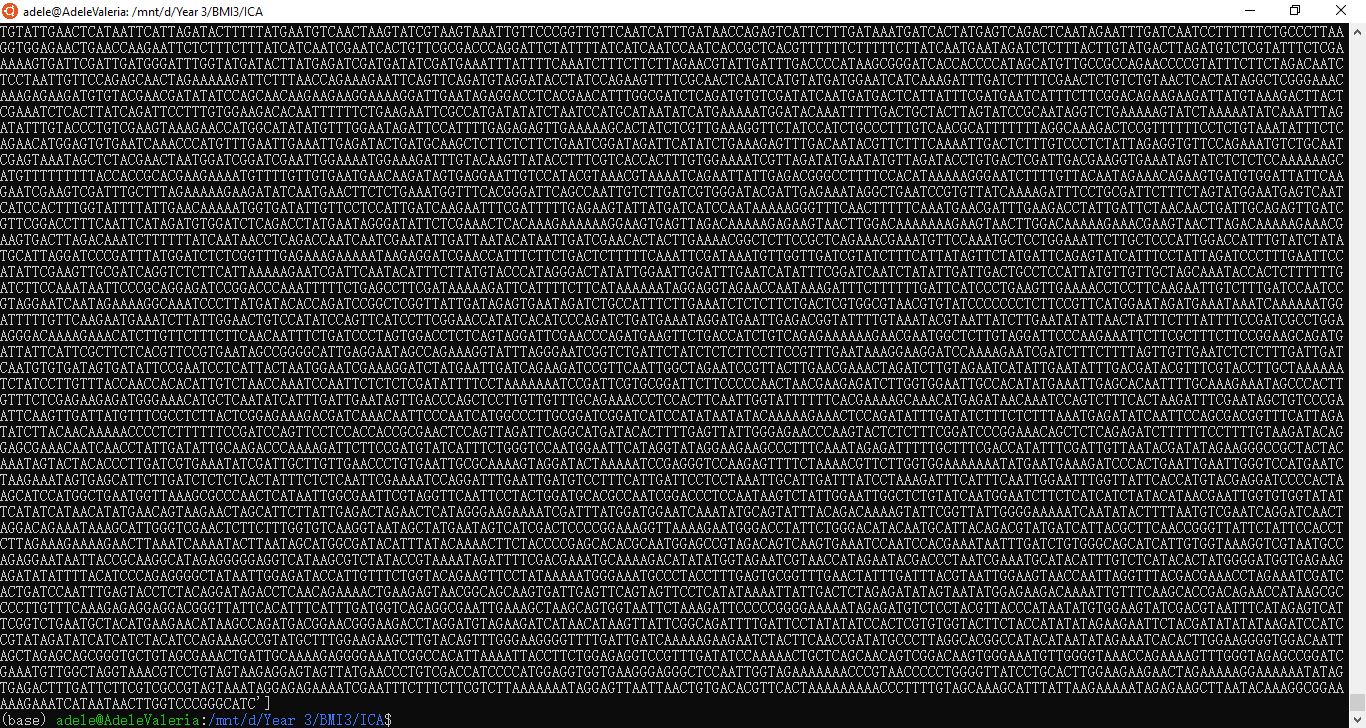

## Construct Hash Table

In [ ]:
def construct_hash_table(all_seq, len_kmer):
    # create an empty dict
    hash_table = {}
    # enumerate: loop through every element (j) in the all_seq list and keep a count of interations (i)
    # learn more here www.geeksforgeeks.org/enumerate-in-python/
    for i, j in enumerate(all_seq):
        # we use kmer as a step because we want to include only NON-OVERLAPPING kmers
        for k in range(0, len(j) - len_kmer+1, len_kmer):
            kmer = j[k:k+len_kmer]
            if kmer in hash_table:
                # record the location (which chromosome and index) for every kmer
                hash_table[kmer] += [(i+1, k+1)]
            else:
                hash_table[kmer] = [(i+1, k+1)]
    return hash_table

# my choice for kmer is 10
hash_table = construct_hash_table(all_seq, 10)

A small part of the hash table that has been constructed:
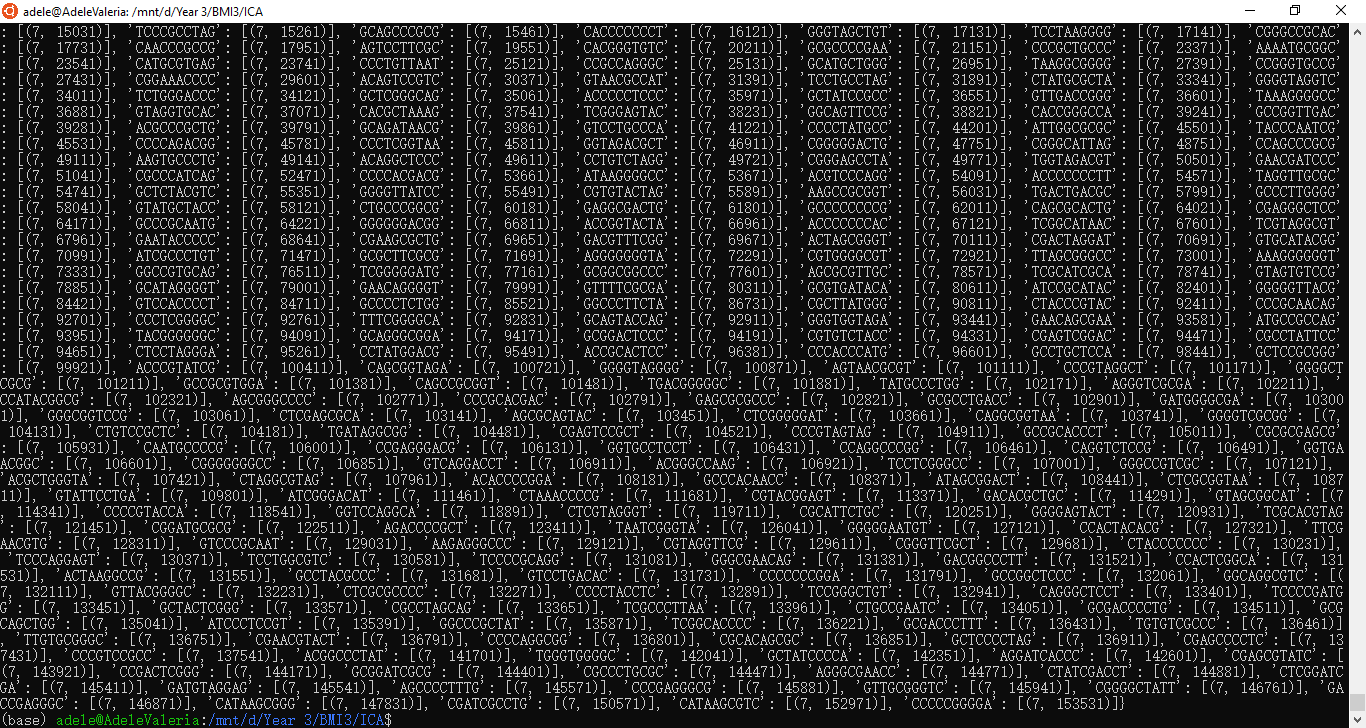